<center>
    <h2>APLICAÇÃO DE CONTROLE CONTÍNUO POR PARTES PARA UM MODELO DE CRESCIMENTO DE TUMORES DE MAMA COM TRATAMENTO POR RADIOTERAPIA</h2>
    <h3>TANISIA DE CARLI FOLETTO</h3>
    <br/>
    <a href="http://livros01.livrosgratis.com.br/cp055589.pdf" target="_blank">download</a>
</center>



<h2><li>Modelo</li></h2>

<h1>
$$
\left \{
\begin{array}{rl}
\dot N = & r_2 N (1-b_2N)-c_4 TN \\
\dot T = & r_1 T (1-b_1T)-c_2 IT - c_3 TN \\
\dot I = & s+\dfrac{\rho I T}{\chi + T} - c_1 I T - d_1 I
\end{array}
\right .
$$
</h1>

In [4]:
import numpy as np
from Model import *

In [5]:
#parametros usados varias vezes
a_1 = 0.2
a_2 = 0.3
a_3 = 0.1
b_1 = 1.0
b_2 = 1.0
c_1 = 1.0
c_2 = 0.5
c_3 = 1.0
c_4 = 1.0
d_1 = 0.2
r_1 = 1.483
r_2 = 1.0
s = 0.33
x = 0.3
p = 0.01

N_0 = np.array([0.9]) 
T_0 = np.array([0.25]) 
I_0 = np.array([0.15]) 

n_0 = np.linspace(0.4, 0.9, num=10)
n_0_fixo = np.array([0.9, 0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9]) 

t_0 = np.linspace(0.1, 0.9, num=10)
t_0_fixo = np.array([0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25]) 

i_0 = np.linspace(0.1, 0.9, num=10)
i_0_fixo = np.array([0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,])

In [6]:
#SIMULAÇÃO DE CRESCIMENTO DE TUMOR DE CANCER DE MAMA (SEM TRATAMENTO)
modelo = Model()
modelo.setParameters(a_1, a_2, a_3, r_1, b_1, c_1, d_1, r_2, b_2, c_2, c_3, c_4, s, p, x, 200, 1)
modelo.initialConditions(N_0, T_0, I_0) # (N, T, I)
modelo.process()

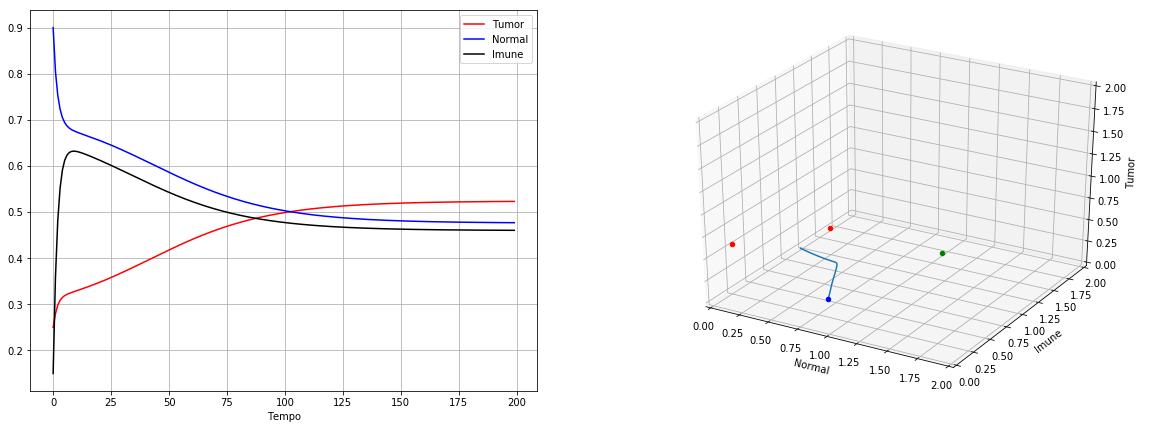

In [8]:
modelo.plot()

In [10]:
#SIMULAÇÃO DE CRESCIMENTO DE TUMOR DE CANCER DE MAMA (SEM TRATAMENTO)
#VÁRIOS DADOS DE ORIGEM

model_normal_fixo = Model()
model_normal_fixo.setParameters(a_1, a_2, a_3, r_1, b_1, c_1, d_1, r_2, b_2, c_2, c_3, c_4, s, p, x, 200, 1)
model_normal_fixo.initialConditions(n_0_fixo, t_0, i_0) # (N, T, I)
model_normal_fixo.process()

model_tumor_fixo = Model()
model_tumor_fixo.setParameters(a_1, a_2, a_3, r_1, b_1, c_1, d_1, r_2, b_2, c_2, c_3, c_4, s, p, x, 200, 1)
model_tumor_fixo.initialConditions(n_0, t_0_fixo, i_0) # (N, T, I)
model_tumor_fixo.process()

model_imune_fixo = Model()
model_imune_fixo.setParameters(a_1, a_2, a_3, r_1, b_1, c_1, d_1, r_2, b_2, c_2, c_3, c_4, s, p, x, 200, 1)
model_imune_fixo.initialConditions(n_0, t_0, i_0_fixo) # (N, T, I)
model_imune_fixo.process()

model_2_fixo = Model()
model_2_fixo.setParameters(a_1, a_2, a_3, r_1, b_1, c_1, d_1, r_2, b_2, c_2, c_3, c_4, s, p, x, 200, 1)
model_2_fixo.initialConditions(n_0_fixo, t_0, i_0_fixo) # (N, T, I)
model_2_fixo.process()

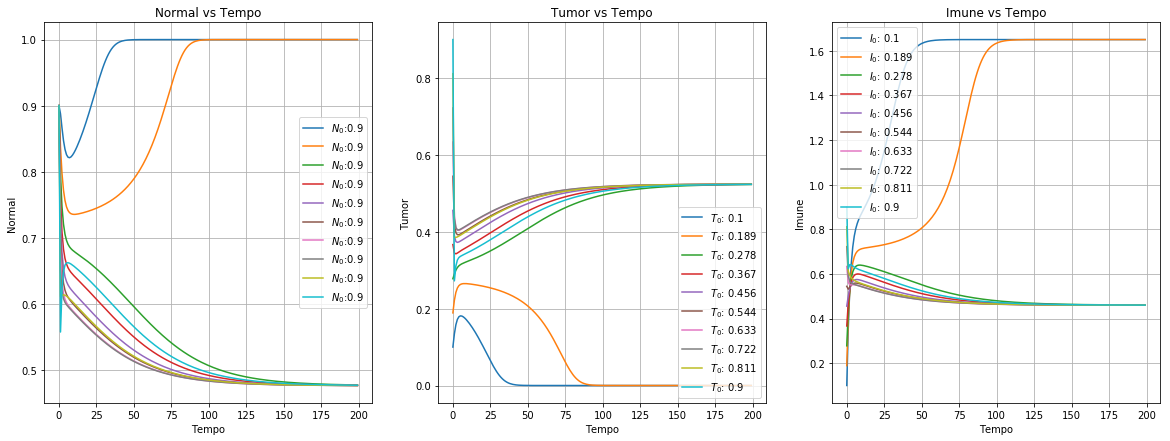

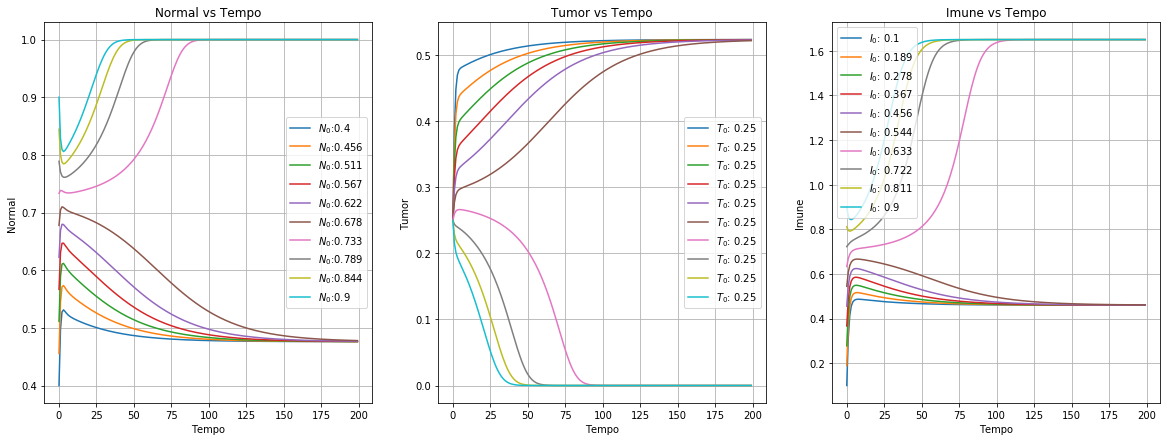

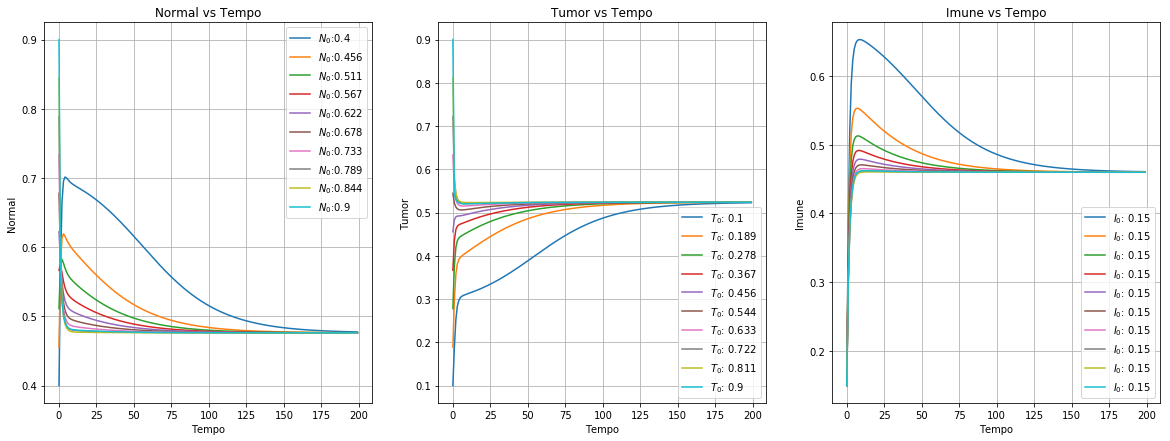

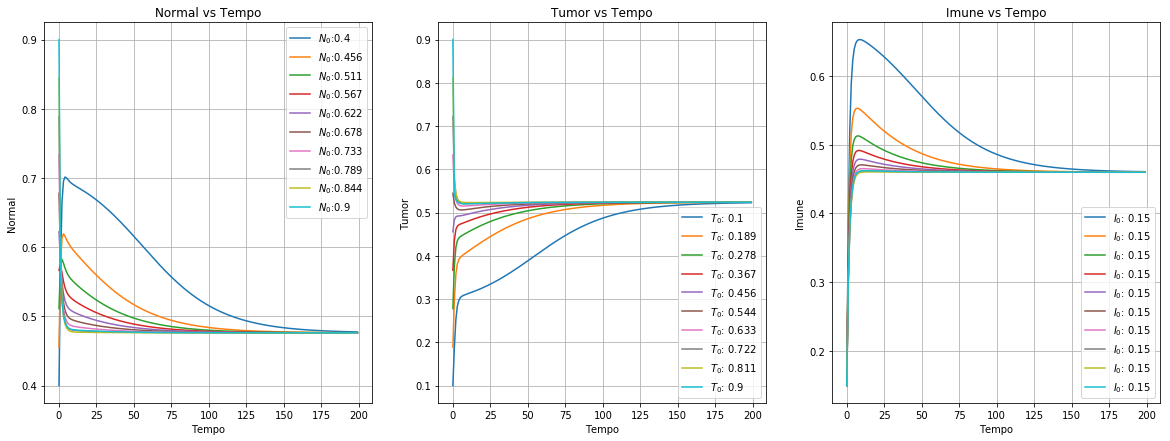

In [11]:
model_normal_fixo.plot2(title='', label=True) #Normal Fixa
model_tumor_fixo.plot2(title='',label=True)   #Tumoral Fixa
model_imune_fixo.plot2(title='',label=True)   #Imune Fixa
model_imune_fixo.plot2(title='',label=True)   #Normal e Imune Fixas

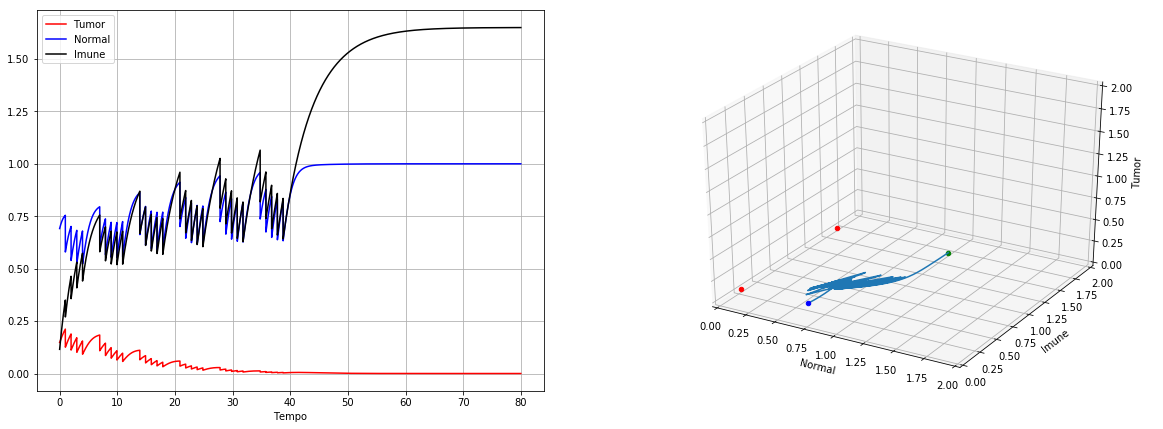

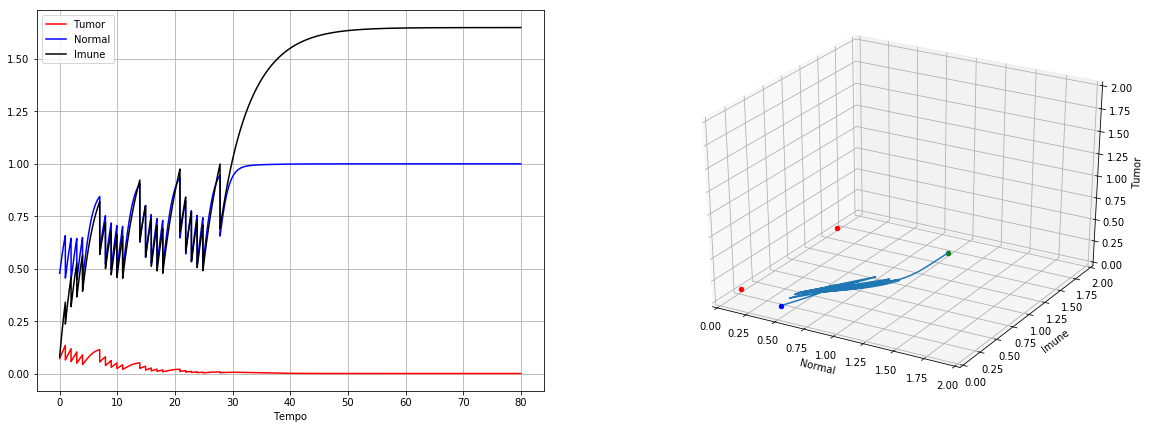

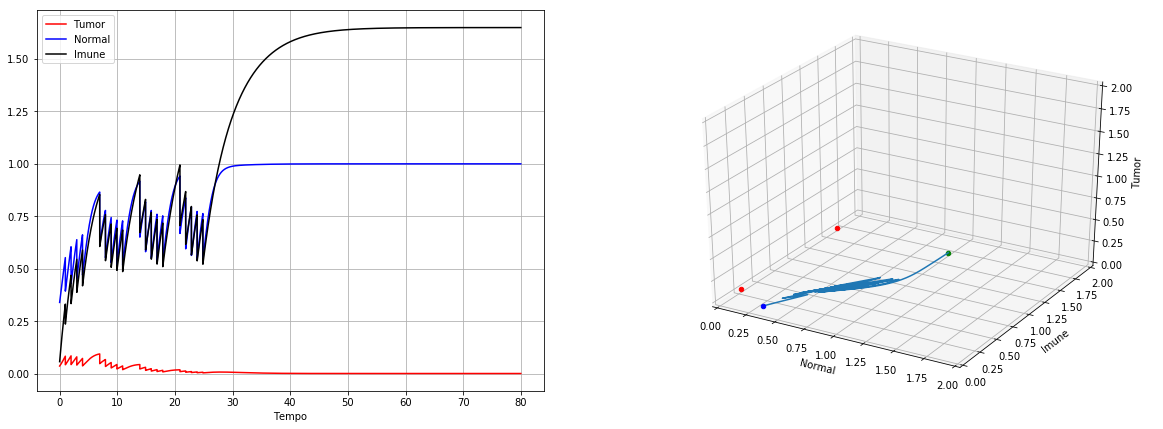

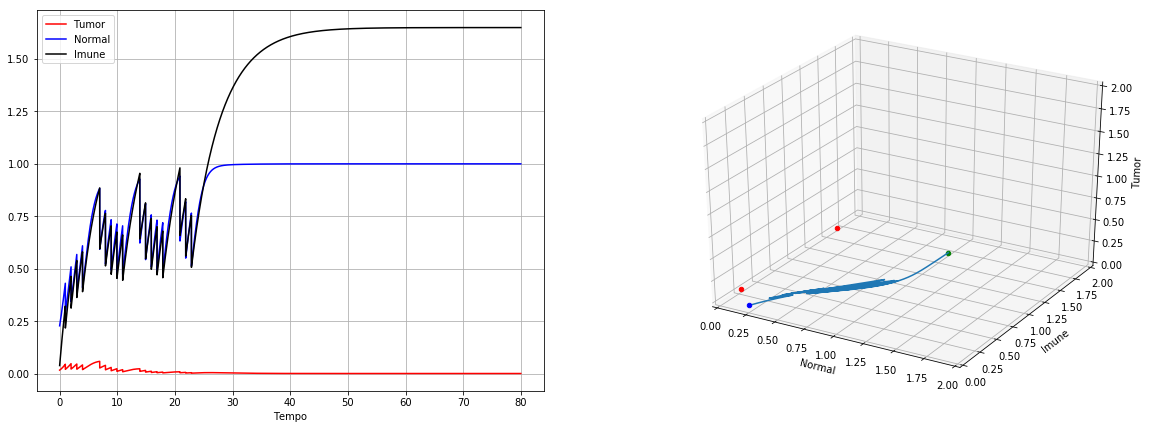

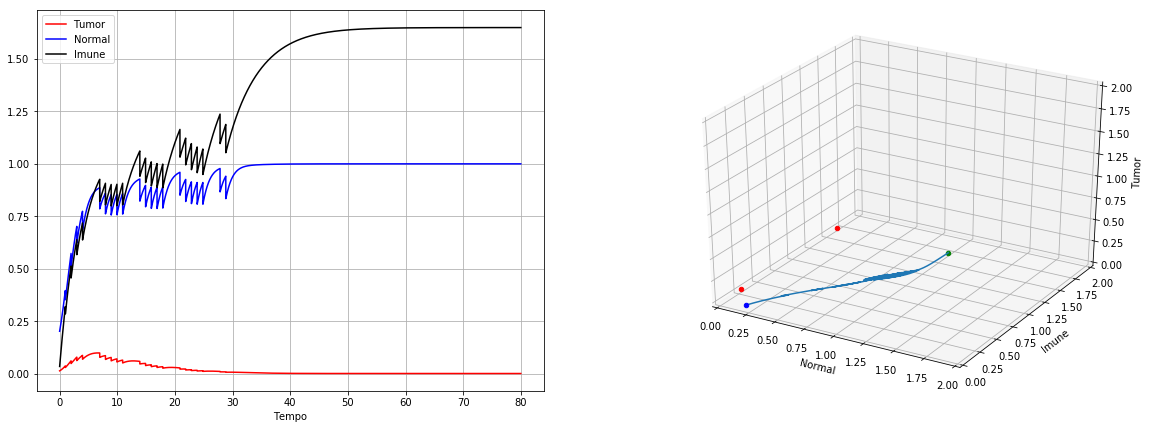

In [12]:
# analise do comportamento do modelo com o modelo linear quadratico para simular o tratamento com radioterapia
# 5 PROTOCOLOS

modelo = Model()
modelo.setParameters(a_1, a_2, a_3, r_1, b_1, c_1, d_1, r_2, b_2, c_2, c_3, c_4, s, p, x, 80, 0.007, True)
modelo.initialConditions(N_0, T_0, I_0) # (N, T, I)
modelo.process(with_treatment=True, plot1=True)

In [13]:
#SIMULAÇÃO DE CRESCIMENTO DE TUMOR DE CANCER DE MAMA COM CONTROLE (SEM TRATAMENTO)
R_ = np.zeros((1,1))
R_[0][0] = 1

modelo = Model()
modelo.setParameters(a_1, a_2, a_3, r_1, b_1, c_1, d_1, r_2, b_2, c_2, c_3, c_4, s, p, x, 200, 1, R=R_)
modelo.initialConditions(N_0, T_0, I_0) # (N, T, I)
modelo.process(with_control=True)

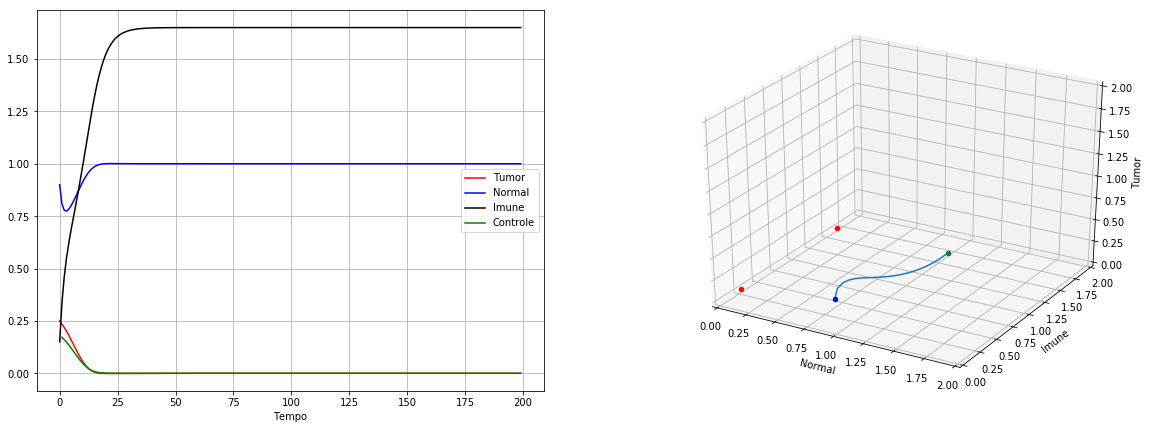

In [14]:
modelo.plot()

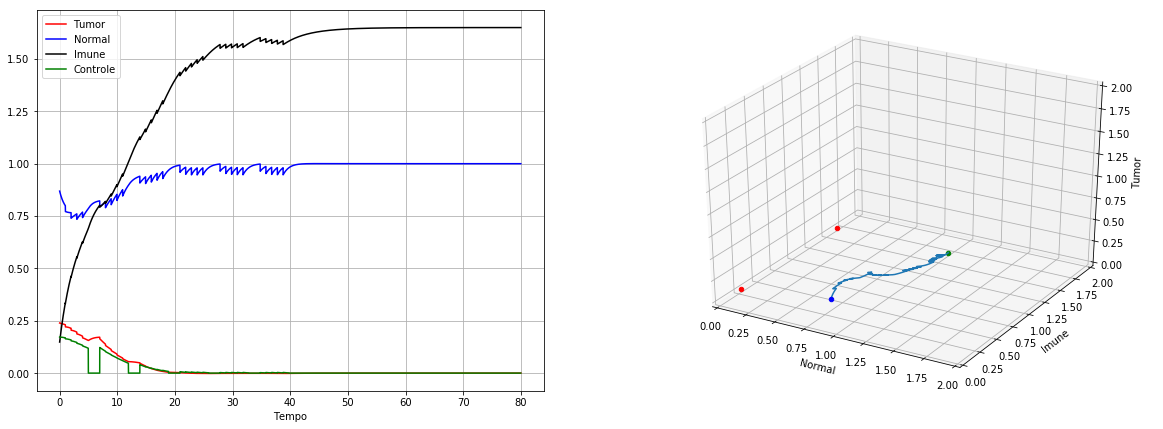

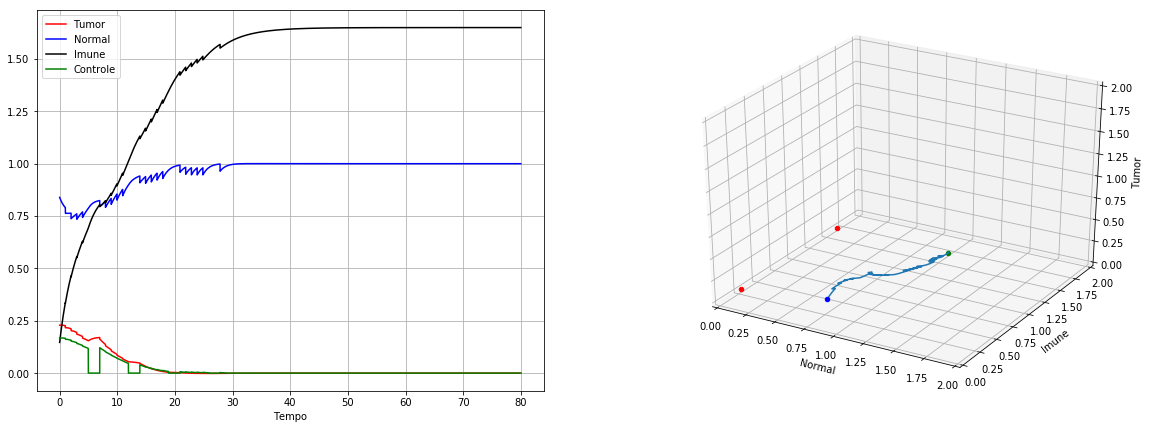

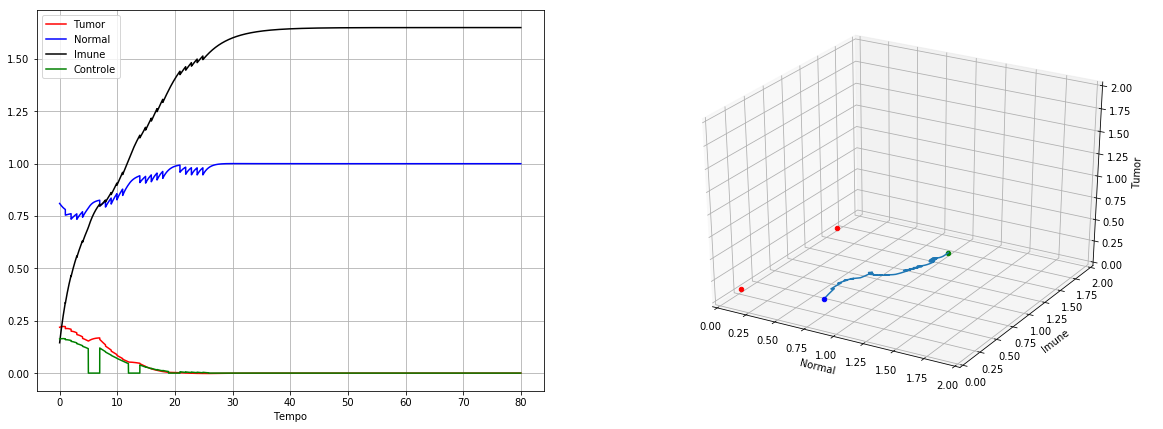

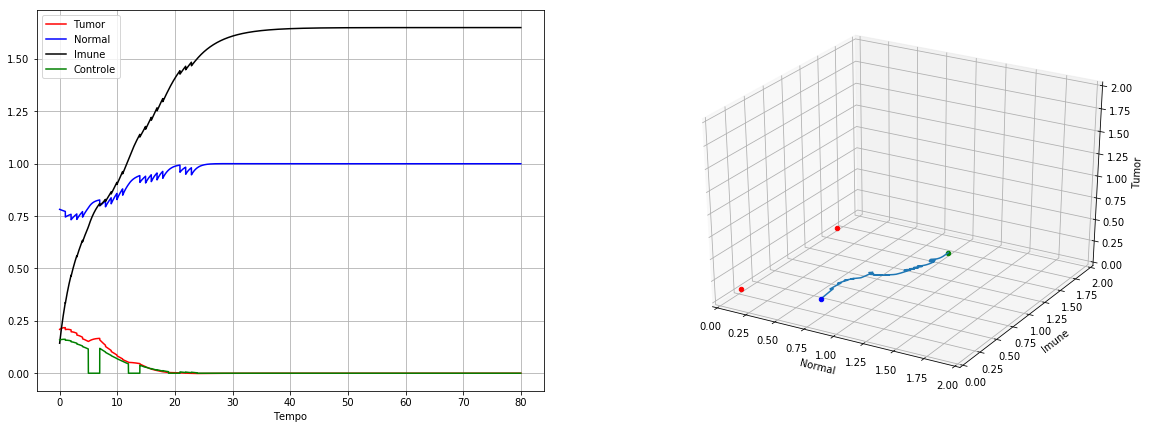

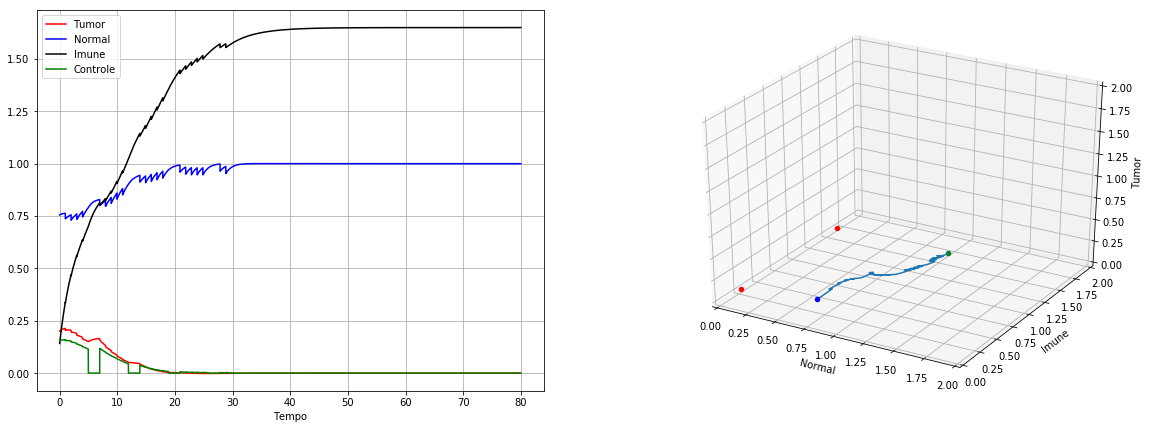

In [16]:
#SIMULAÇÃO DE CRESCIMENTO DE TUMOR DE CANCER DE MAMA COM CONTROLE, POR PARTES SIMULANDO O TRATAMENTO (EM TESTES)
R_ = np.zeros((1,1))
R_[0][0] = 1

modelo = Model()
modelo.setParameters(a_1, a_2, a_3, r_1, b_1, c_1, d_1, r_2, b_2, c_2, c_3, c_4, s, p, x, 80, 0.007, R=R_)
modelo.initialConditions(N_0, T_0, I_0) # (N, T, I)
modelo.process(with_control=True, with_treatment=True, plot1=True)
#modelo.plot()